# A explorar los datos del LHC

![](files/CMS_Higgs-event.jpg)

Hoy vamos a combinar dos conceptos que vimos ayer:

* Abrir bases de datos con pandas
* Visualizar datos mediante histogramas

Ademas veremos como:

* Utilizar scatter plots 2D 
* Box plots

### Nuestra meta: <br> Pensar como classificar un datos como boson (s) o ruido (b)

## Primero las librerias

Instalaremos una libreria (**seaborn**) para visualizacion avanzada usando el comando en su terminal (**anaconda prompt** o **terminal**):
```shell
conda install seaborn
```




In [1]:
import pandas as pd
import numpy as np # modulo de computo numerico
import matplotlib.pyplot as plt # modulo de graficas
# esta linea hace que las graficas salgan en el notebook
import seaborn as sns
%matplotlib inline

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Datos LHC

Hemos preparado una version mini de los datos, que funcionara bastante bien.
Los datos estan en formato CSV  (Que siginifica CSV?)

In [5]:
df = pd.read_csv('files/mini-LHC.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


## Utilidades:

Podemos accesar informacion de la base de datos (DataFrame) mediante las siugientes formas:

### Tamaño 
Para eso podemos usar **len()** (longitud) y **.shape** (forma).

In [6]:
print(df.shape)

(10000, 33)


In [7]:
print(len(df))

10000


### Columnas

In [8]:
print(df.columns)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')


## Y si quiero imprimir columnas, una por una?

Usamos un for!

In [9]:
for col in df.columns:
    print(col)

EventId
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight
Label


### Recuerda: <br> Para accesar una columna usamos su nombre

In [10]:
df['PRI_met']

0        16.824
1        44.704
2        54.283
3        31.082
4         2.723
5        40.735
6        38.421
7        22.275
8        37.791
9       132.678
10       51.276
11       22.385
12       43.910
13       12.439
14       75.197
15       19.959
16       41.899
17       17.557
18       44.698
19       72.981
20       67.909
21       27.431
22       12.556
23       17.960
24       27.318
25       10.098
26       32.070
27       69.364
28       39.141
29       26.438
         ...   
9970     34.756
9971     32.176
9972      6.182
9973     32.681
9974     19.568
9975     16.777
9976     55.911
9977    152.360
9978     40.559
9979     76.026
9980    104.796
9981     25.502
9982     27.240
9983     21.641
9984     86.910
9985     24.584
9986     23.453
9987     38.499
9988     18.259
9989     60.186
9990     37.312
9991     72.903
9992     21.698
9993      0.505
9994     29.066
9995     39.056
9996     48.681
9997      1.344
9998      9.784
9999     23.558
Name: PRI_met, dtype: fl

### Dividir datos
Finalmente vamos dividir los datos entre los que son bosones (s) y los que no.
Cada uno sera una base de datos seprada

In [11]:
boson_df = df[df['Label']=='s']
ruido_df = df[df['Label']=='b']

## Preguntas:

* Cuantos Bosones tenemos?
* Y cuantos de ruido?

In [15]:
print (len(boson_df))
print (len(ruido_df))

3372
6628


## Visualizar!

Ahora que sabemos accesar a los datos, vamos a visualizar los datos.

Como ejemplo usaremos la propiedad fisica **DER_mass_MMC** que de acuerdo al documento de datos dice:

> **DER_mass_MMC:** The estimated mass mH of the Higgs boson candidate, obtained through a prob- abilistic phase space integration

Es decir la masa estimada de la particula.

## BoxPlot

Con los boxplots, vemos el minimo, maximo, promedio y una caja donde esta concentrado la mayoria de los datos (75%).

Con boxplots usamos todos los datos no divididos (**df**)..le decimos quien es esta en el eje x (**Label**) y quien en el eje y que puede ser cualquier propiedad fisica.

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


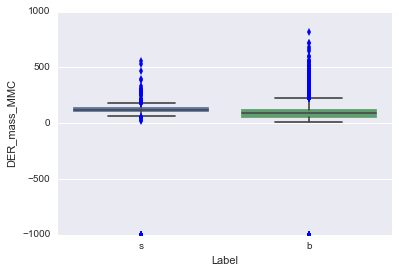

In [16]:
sns.boxplot(x="Label", y="DER_mass_MMC",data=df)
plt.show()

## Histogramas

Usando la funcion **sns.distplot**, esta combina la funcionalidad de un histograma y ademas trata de ajustar una curva a los datos.

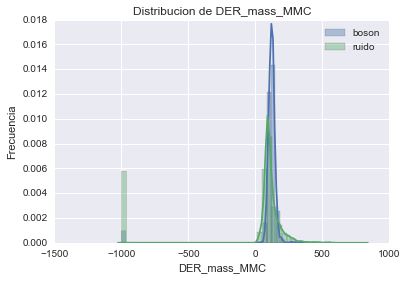

In [17]:
sns.distplot(boson_df["DER_mass_MMC"],label='boson')
sns.distplot(ruido_df["DER_mass_MMC"],label='ruido')
plt.ylabel('Frecuencia')
plt.legend()
plt.title("Distribucion de DER_mass_MMC")
plt.show()

## Scatter plots

Con scatter plots podemos ver la relacion de dos variables, graficando puntos en una dimension (X) y luego en otra (Y).

En este caso escojemos una variable extra **PRI_tau_pt**  que segun la documentacion representa

> **PRI_tau_pt** The transverse momentum  $\sqrt{p^2_x + p^2_y}$ of the hadronic tau.

Es decir el momento transversal del tau hadronico..algo loco

Probemoslo:

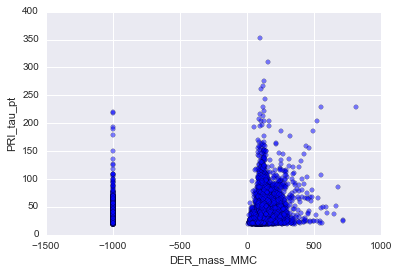

In [18]:
ejeX = "DER_mass_MMC"
ejeY = "PRI_tau_pt"
plt.scatter(df[ejeX],df[ejeY],alpha=0.5)
plt.xlabel(ejeX)
plt.ylabel(ejeY)
plt.show()

#### Ven algun problema ?

En este caso tiene sentido visualizar los datos separados...asi tenemos una mejor idea

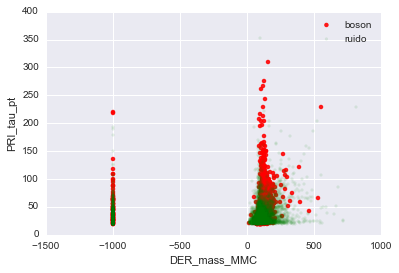

In [20]:
ejeX = "DER_mass_MMC"
ejeY = "PRI_tau_pt"
plt.scatter(boson_df[ejeX],boson_df[ejeY],c='r',alpha=0.9,s=20,label='boson',lw=0)
plt.scatter(ruido_df[ejeX],ruido_df[ejeY],c='g',alpha=0.1,s=10,label='ruido',lw=0)
plt.xlabel(ejeX)
plt.ylabel(ejeY)
plt.legend()
plt.show()

# Actividad: Como classificar el higgs?

![](files/classificar.png)


Juntarse en grupos de 6, y juntos exploraran todas las variables que hay.

Que hacer:

* Usar las herramientas que ya vimos para visualizar las variables, en una dimension y en dos.


Discutir:

* Que variables son las mas imporates visualmente?
* Como separariamos al boson visualmente?
* Que retos ven? Es decir que dificultades hay con este enfoque?
* Como las podrian resolver?
* Por que es necesario classificar el boson?